In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import math
import matplotlib.pyplot as plt
import seaborn as sns

- Load Data set


In [2]:
df = pd.read_csv("NYC TLC Trip Record.csv")
display(df.head(5), df.shape)

C:\Users\arist\AppData\Local\Temp\ipykernel_29932\521276861.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


(68211, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


- Penanganan kolom tidak terpakai

'enhail_fee' because this column has 100% missing value

'tolls_amount' since the majority (97.4%) value is zero.

'store_and_fwd_flag', highly imbalance (>95%)

'improvement_surcharge', 'congestion_surcharge' since there's no possible insight I can get from this columns.

In [5]:
df.drop(['ehail_fee', 'tolls_amount', 'store_and_fwd_flag' , 'improvement_surcharge', 'congestion_surcharge'],axis=1, inplace=True)

- Penanganan Nilai yang Hilang (Missing Value Data)

In [6]:
# Checking the total missing value from each columns
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
total_amount                0
payment_type             4324
trip_type                4334
dtype: int64

<Axes: >

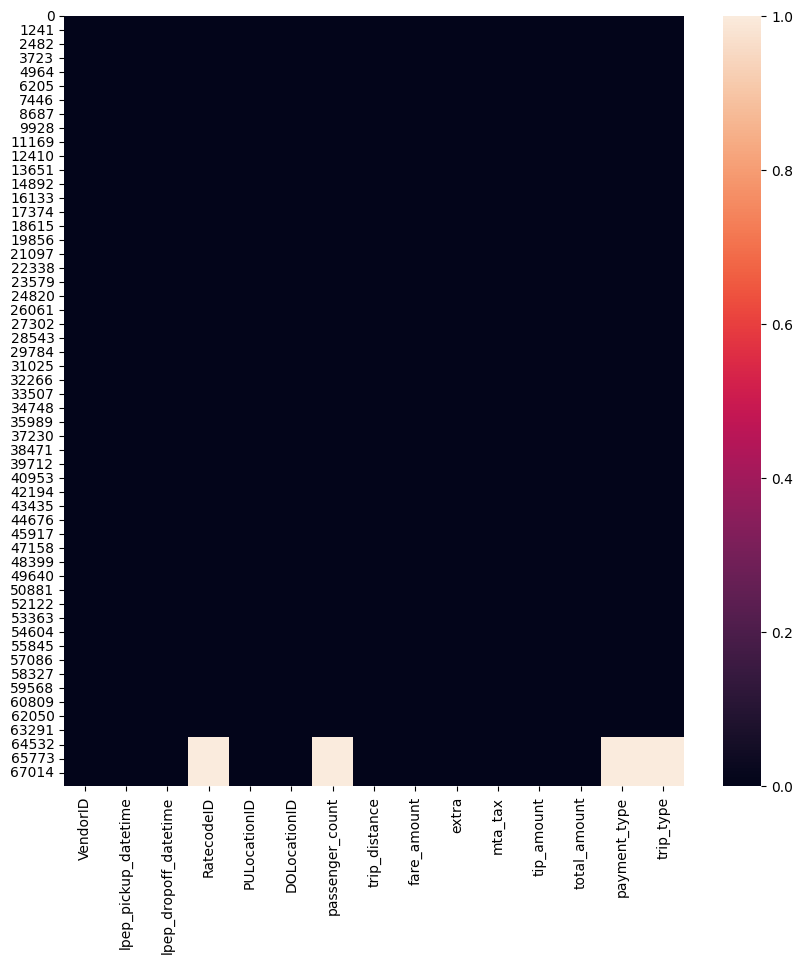

In [7]:
# Visualize the missing value distribution using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Handling missing value on column 'RatecodeID'

In [8]:
# fill missing value with mean
df['RatecodeID'].fillna(df['RatecodeID'].mean(), inplace=True)

C:\Users\arist\AppData\Local\Temp\ipykernel_29932\575911967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].mean(), inplace=True)


Handling missing value on column 'passenger_counts'

In [9]:
# fill missing value with median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df['passenger_count'].value_counts(dropna=False)


C:\Users\arist\AppData\Local\Temp\ipykernel_29932\2351128916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


passenger_count
1.0    58623
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

Handling missing value on column 'payment_type'

In [10]:
# make def conditional function to fill payment type based on tip amount.
def fill_payment_type(row):
    if pd.isnull(row['payment_type']):
        if row['tip_amount'] > 0:
            return 1  # 1 is the code for credit card
        else:
            return 5  # Set to 5 for unknown payment type
    else:
        return row['payment_type']

# apply the function
df['payment_type'] = df.apply(fill_payment_type, axis=1)                                                                                     

Handling missing value on column 'trip_type'

It's know that trip_type is code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.

1 = Street-hail

2 = Dispatch

In [11]:
df[(df['trip_type']==1)].value_counts('RatecodeID')

RatecodeID
1.0    62097
2.0      158
5.0      136
4.0       55
3.0       30
Name: count, dtype: int64

In [12]:
df[(df['trip_type']==2)].value_counts('RatecodeID')

RatecodeID
5.0    1393
1.0       6
4.0       2
Name: count, dtype: int64

based on the data above, we can assume that majority trip having RatecodeID 5 are included as Dispatch trip.

In [13]:
# filter data ratecodeID 5
# impute missing trip_type with 2 (dispatch trip)
df.loc[(df['RatecodeID']==5) & (df['trip_type'].isna()), 'trip_type'] = 2

# impute the rest missing trip_type as 1 (Street-hail)
df['trip_type'].fillna(1, inplace=True)
df['trip_type'].value_counts()

C:\Users\arist\AppData\Local\Temp\ipykernel_29932\1184481040.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_type'].fillna(1, inplace=True)


trip_type
1.0    66810
2.0     1401
Name: count, dtype: int64

Removed unecessary rows

In [15]:
pd.set_option('display.max_colwidth', 0)

listItem = []
for col in df[['RatecodeID', 'passenger_count', 'payment_type', 'trip_type']]:
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,RatecodeID,7,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, 1.1171599855995742]"
1,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
2,payment_type,5,"[1.0, 2.0, 3.0, 4.0, 5.0]"
3,trip_type,2,"[1.0, 2.0]"


<Axes: >

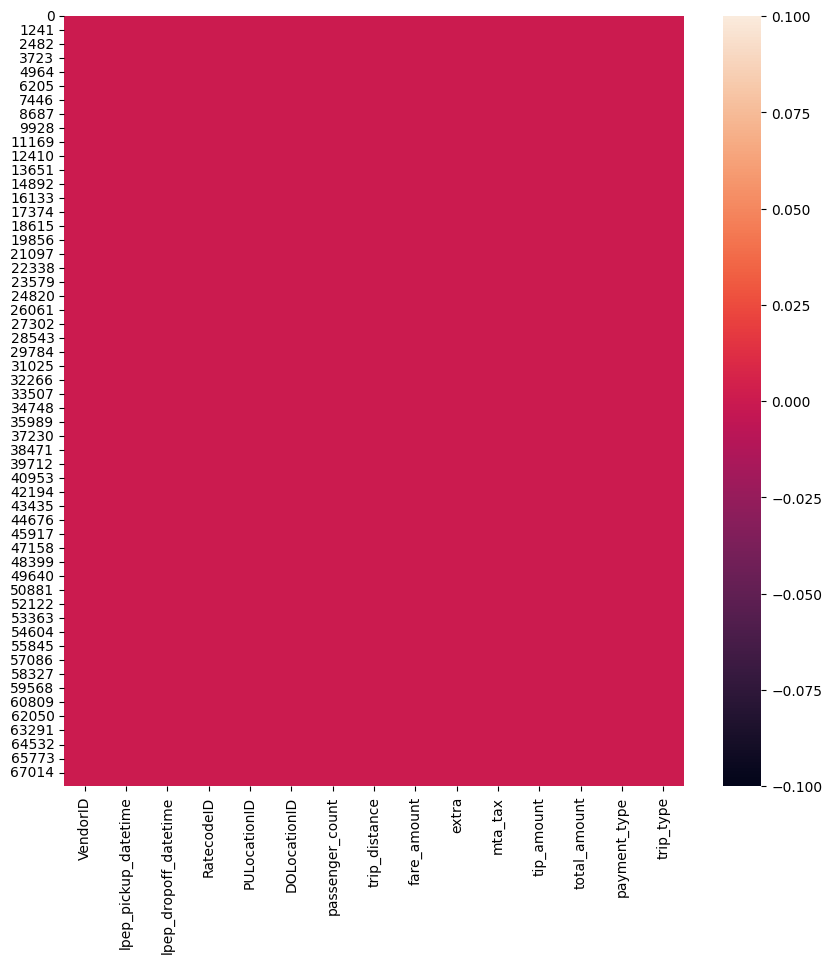

In [16]:
# Recheck & Visualize the missing value distribution using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Adjust data types

In [17]:
# change pick up and drop off time to date time data types
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

In [18]:
# make sure the data only show in January 2023
# Decide range time
start_date = '2023-01-01'
end_date = '2023-01-31'

# Filter data based on range time
df = df[(df['lpep_pickup_datetime'] >= start_date) & (df['lpep_dropoff_datetime'] <= end_date)]

Change value and data type of categorical variabel from 'object' or 'float' to 'integer'

In [19]:
# Change columns with categorical data types into int
df[['RatecodeID','passenger_count','payment_type', 'trip_type']] = df[['RatecodeID', 'passenger_count', 'payment_type', 'trip_type']].astype(int)

Eliminate anomaly

In [20]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')
num_var.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,total_amount,payment_type,trip_type
count,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000,65891.000000
mean,1.863396,1.110485,98.532394,138.479458,1.296247,8.200015,16.596240,0.818655,0.587823,2.138874,21.776429,1.379384,1.020534
std,0.343432,1.347846,61.255953,76.769865,0.950843,594.991298,13.462782,1.265993,0.385562,3.064511,15.448453,0.587937,0.141819
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,-71.500000,1.000000,1.000000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.120000,9.300000,0.000000,0.500000,0.000000,12.900000,1.000000,1.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.580000,17.900000,1.000000,1.000000
75%,2.000000,1.000000,129.000000,220.000000,1.000000,3.220000,19.800000,1.000000,0.500000,3.330000,26.185000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,491.000000,5.000000,2.000000


In [21]:
# remove negative value
df= df[(df['total_amount']>=0)]

Handling zero values

In [22]:
# Calculate the mean of the 'trip_distance' column, excluding zero values
mean_distance = df[df['trip_distance'] != 0]['trip_distance'].mean()

# Replace zero values in 'trip_distance' with the calculated mean
df['trip_distance'] = df['trip_distance'].apply(lambda x: mean_distance if x == 0 else x)

In [23]:
# Calculate the mean of the 'trip_distance' column, excluding zero values
median_passenger = df[df['passenger_count'] != 0]['passenger_count'].median()

# Replace zero values in 'trip_distance' with the mode
df['passenger_count'] = df['passenger_count'].apply(lambda x: median_passenger if x == 0 else x)

Remove Outliers

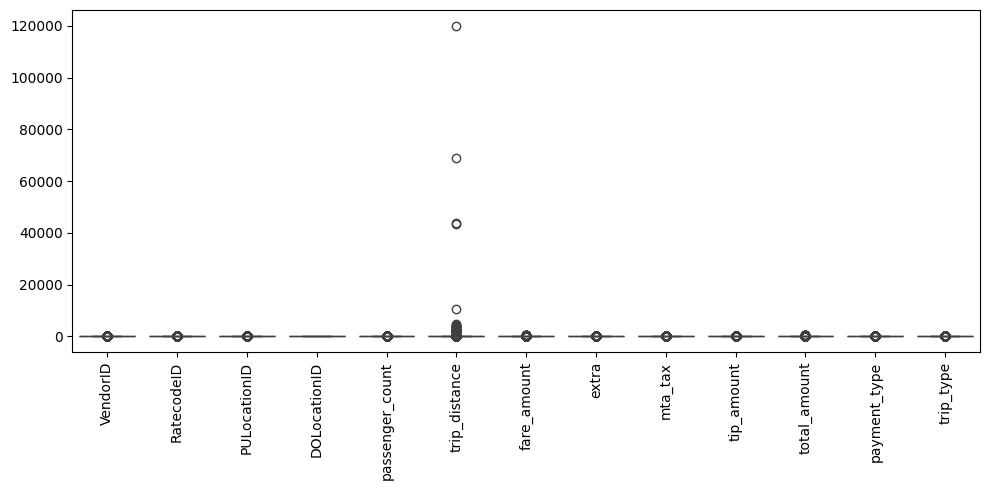

In [24]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# visualize the data distribution to identify outlier using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=num_var)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There's an extreme value on column 'trip_distance'. To ensure only values within a reasonable range are kept, we use IQR method to remove rows with extreme values.

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) at column 'trip_distance'
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

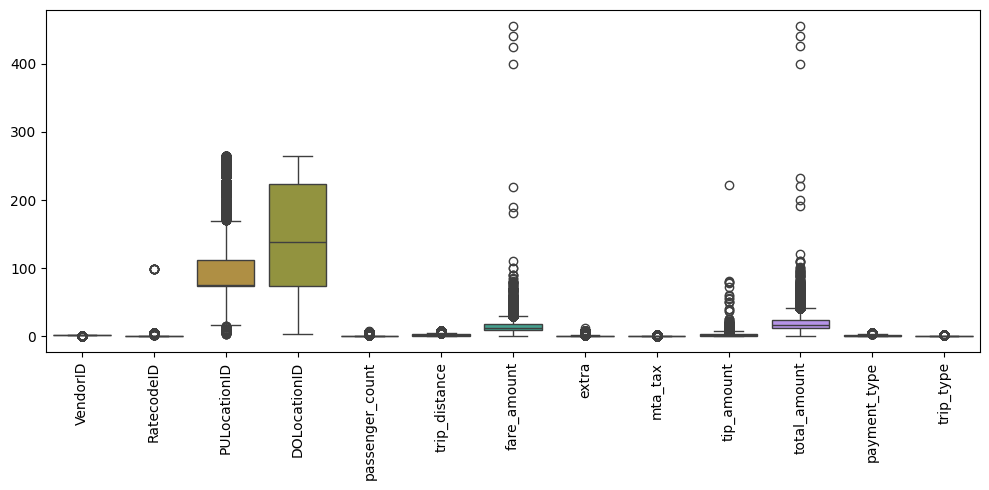

In [26]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# visualize the data distribution to identify outlier using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=num_var)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We could still found extreme value at total amount, actually it's acceptable because fare amount can be negotiate and doesn't have limit value. But for the research sake, we will drop the extreme value if its not significantly affect dataset presentation.

In [27]:
# filter total_amount >$100 based on the figure
len(df[df['total_amount']>100])

15

In [28]:
# since it only 16 rows, we will drop them
df = df[df['total_amount'] <= 100]

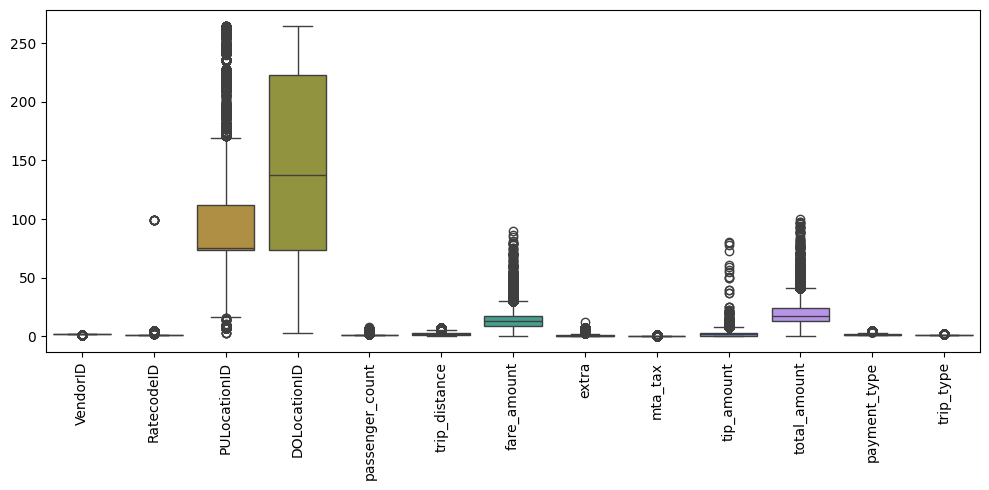

In [29]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# visualize the data distribution to identify outlier using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=num_var)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,total_amount,payment_type,trip_type
count,58843.000000,58843,58843,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000,58843.000000
mean,1.878592,2023-01-16 10:37:54.492055296,2023-01-16 10:54:24.283346944,1.065717,96.115868,138.011199,1.309213,2.296889,14.445002,0.848096,0.585388,1.983848,19.418644,1.374369,1.011386
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2023-01-09 08:04:20,2023-01-09 08:22:24.500000,1.000000,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,12.800000,1.000000,1.000000
50%,2.000000,2023-01-16 16:23:48,2023-01-16 16:38:03,1.000000,75.000000,138.000000,1.000000,1.840000,12.800000,0.000000,0.500000,1.740000,17.160000,1.000000,1.000000
75%,2.000000,2023-01-23 19:32:21.500000,2023-01-23 19:45:17,1.000000,112.000000,223.000000,1.000000,2.980000,17.700000,1.000000,0.500000,3.250000,24.150000,2.000000,1.000000
max,2.000000,2023-01-30 23:51:11,2023-01-31 00:00:00,99.000000,265.000000,265.000000,8.000000,7.440000,90.000000,12.500000,1.500000,80.880000,99.950000,5.000000,2.000000
std,0.326603,NaN,NaN,1.228457,58.768268,76.709212,0.960974,1.556951,7.501033,1.262042,0.358635,2.374490,9.287286,0.564762,0.106098


- Duplicated Data

In [31]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(58843, 15)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[1, 2]"
1,lpep_pickup_datetime,datetime64[ns],0,57741,"[2023-01-17T20:42:07.000000000, 2023-01-24T13:24:54.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,57710,"[2023-01-16T21:32:22.000000000, 2023-01-24T08:07:05.000000000]"
3,RatecodeID,int64,0,6,"[3, 1]"
4,PULocationID,int64,0,192,"[69, 250]"
5,DOLocationID,int64,0,240,"[261, 11]"
6,passenger_count,float64,0,8,"[5.0, 4.0]"
7,trip_distance,float64,0,744,"[3.89, 3.24]"
8,fare_amount,float64,0,1734,"[20.45, 19.03]"
9,extra,float64,0,13,"[6.0, 7.5]"


- DATA ANALYSIS

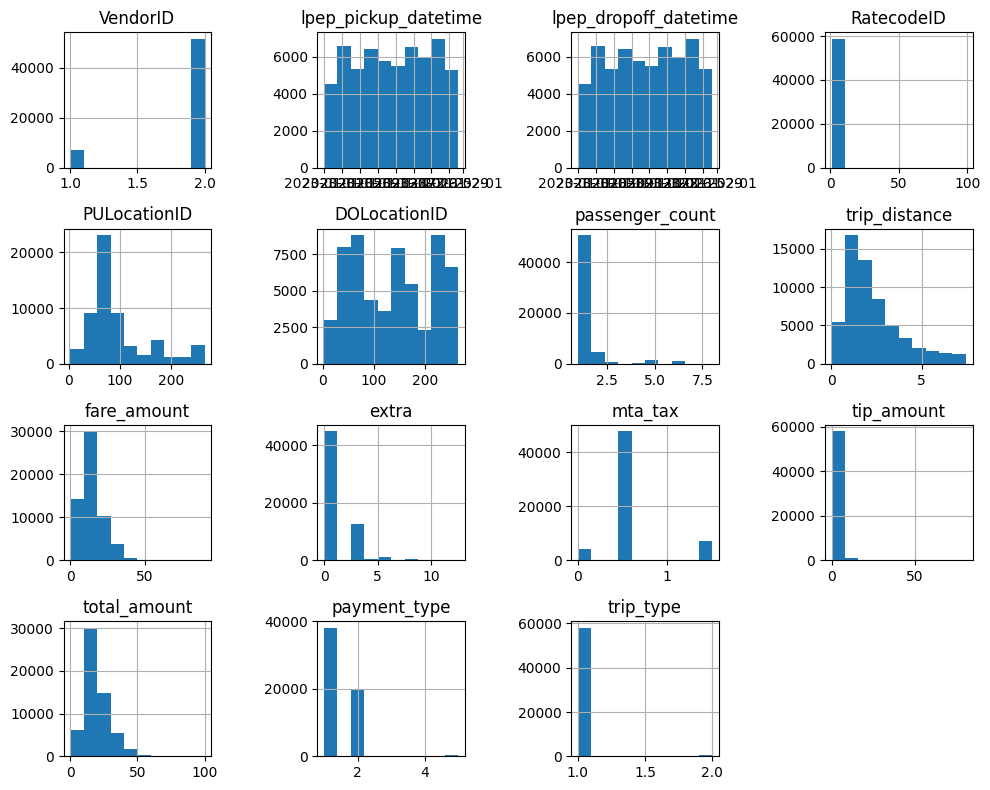

In [34]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Dataset is not normally distributed.

- Corelation


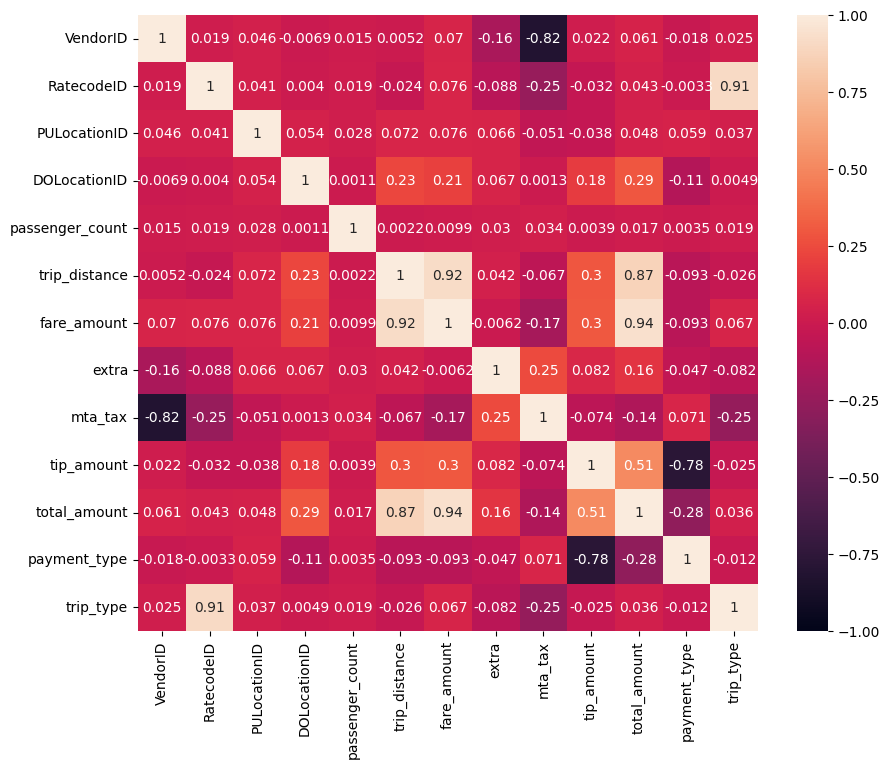

In [35]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# find correlation between column using spearman
plt.figure(figsize=(10,8))
sns.heatmap(num_var.corr('spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

Total_amount is highly overall correlated with fare_amount (0.94), trip_distance(0.87)

VendorID is highly overall correlated with mta_tax (-0.82)

Payment_type is highly overall correlated with tip_amount (-0.78)

RatecodeID is highly overall correlated with trip_type (0.7)

Problem Analysis

In [36]:
# Create trip_duration
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 3600.0

# Create columns for month and day of the week
df['month'] = df['lpep_pickup_datetime'].dt.month
df['day_of_week'] = df['lpep_pickup_datetime'].dt.dayofweek

In [37]:
# NB: finding outlier in trip duration (23.98 hours), want to clean the data
len(df[df['trip_duration'] > 2])

211

In [38]:
# since its only 212 data, let's drop the rows
df = df[df['trip_duration'] <= 2]

- Identify peak hours and days for yellow taxi demand.

In [39]:
# Extrac lpep_pickup_datetime
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()

# Calculate total trip per hour in a day
hourly_demand = df['pickup_hour'].value_counts().sort_index().to_frame()
hourly_demand= hourly_demand.reset_index()

# calculate total trip per day in a week
daily_demand = df['pickup_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).to_frame()
daily_demand = daily_demand.reset_index()

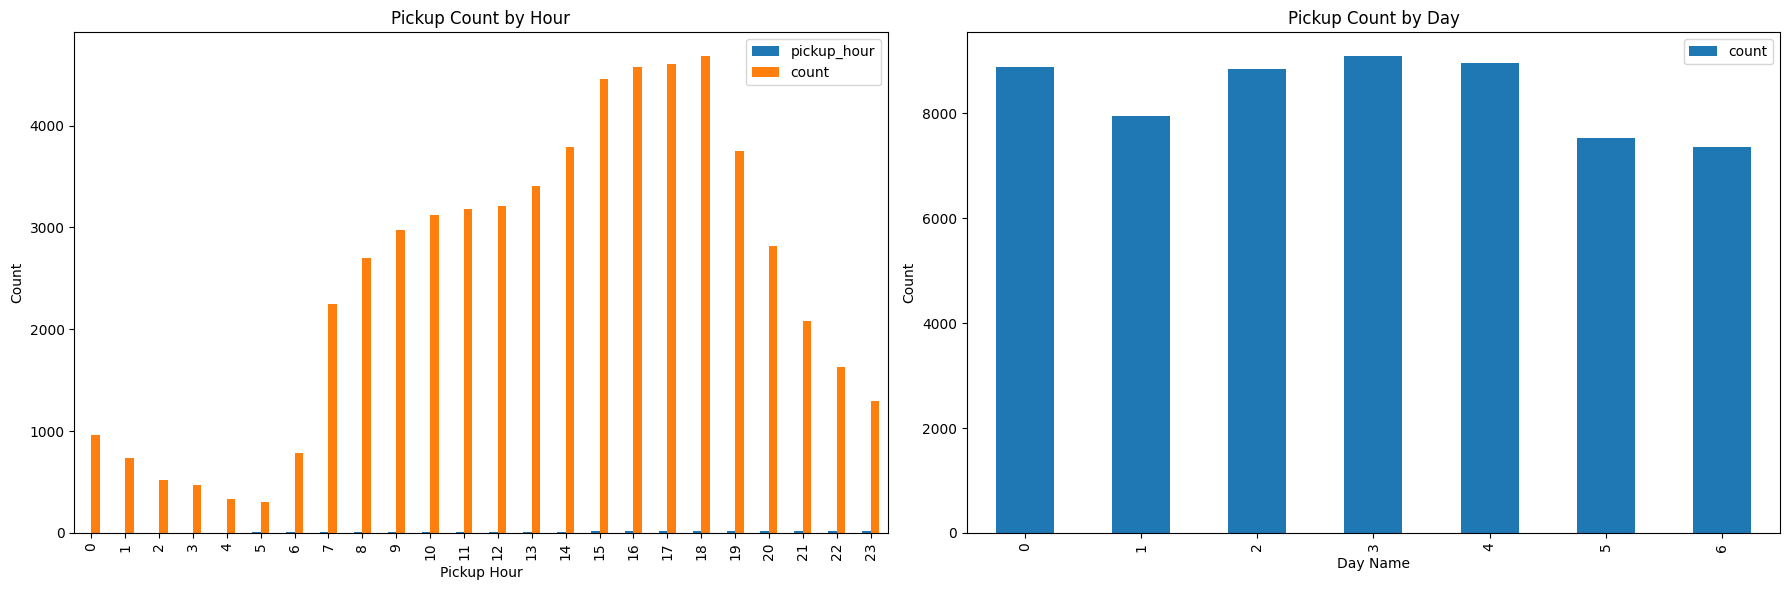

In [40]:
# Create subplot for two bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart for pickup count by hour
hourly_demand.plot(kind='bar', ax=axes[0])
axes[0].set_title('Pickup Count by Hour')
axes[0].set_xlabel('Pickup Hour')
axes[0].set_ylabel('Count')

# Bar chart for pickup count by day
daily_demand.plot(kind='bar', ax=axes[1])
axes[1].set_title('Pickup Count by Day')
axes[1].set_xlabel('Day Name')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

- Examine the distribution of trip distances and durations.

KeyboardInterrupt: 

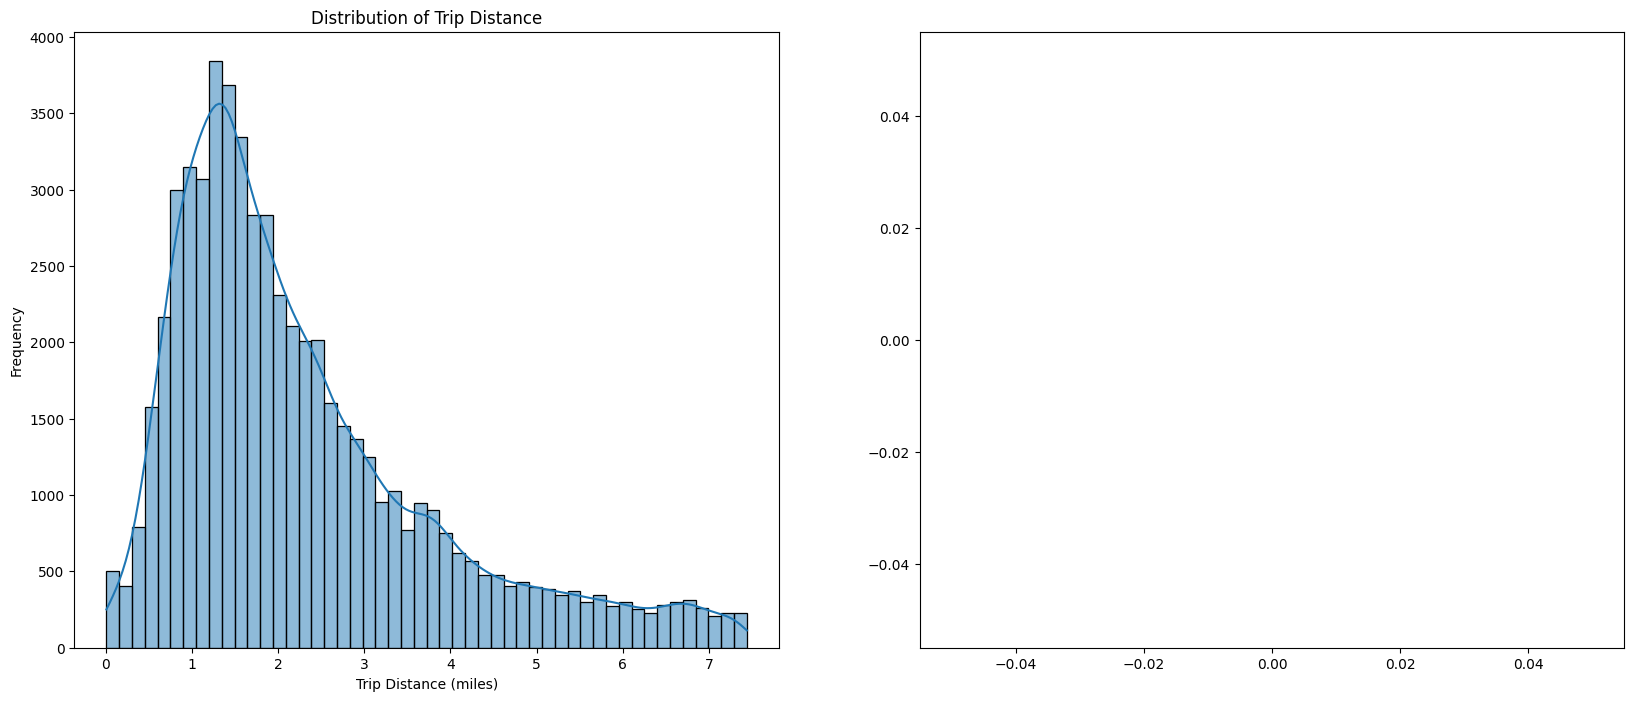

In [41]:
# Create figure and axes for the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Histogram and KDE for trip distance
sns.histplot(df['trip_distance'], bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of Trip Distance')
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Frequency')

# Histogram and KDE for trip duration
sns.histplot(df['trip_duration'], bins=50, kde=True, ax=ax2)
ax2.set_title('Distribution of Trip Duration')
ax2.set_xlabel('Trip Duration (hour)')
ax2.set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

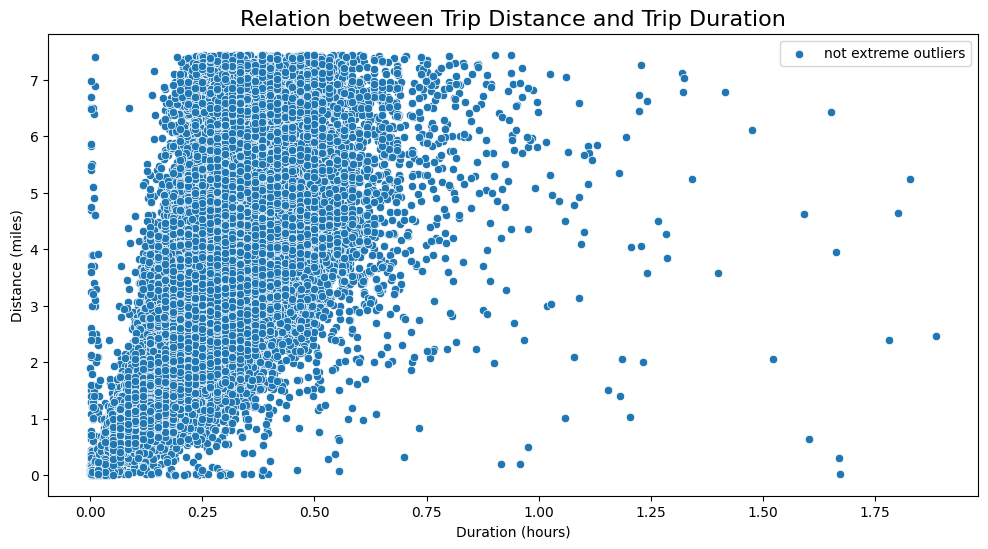

In [149]:
# display the relation between Trip Distance and Trip Duration
plt.figure(figsize=(12,6))

sns.scatterplot(df, x='trip_duration', y='trip_distance', label='not extreme outliers')

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (miles)')
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

- Explore the relationship between passenger count and fare amount.

In [150]:
# Display descriptive statistics for passenger_count and fare_amount
df[['passenger_count', 'fare_amount']].describe()

,passenger_count,fare_amount
count,58632.000000,58632.000000
mean,1.309797,14.439674
std,0.961868,7.500238
min,1.000000,0.000000
25%,1.000000,9.300000
50%,1.000000,12.800000
75%,1.000000,17.700000
max,8.000000,90.000000


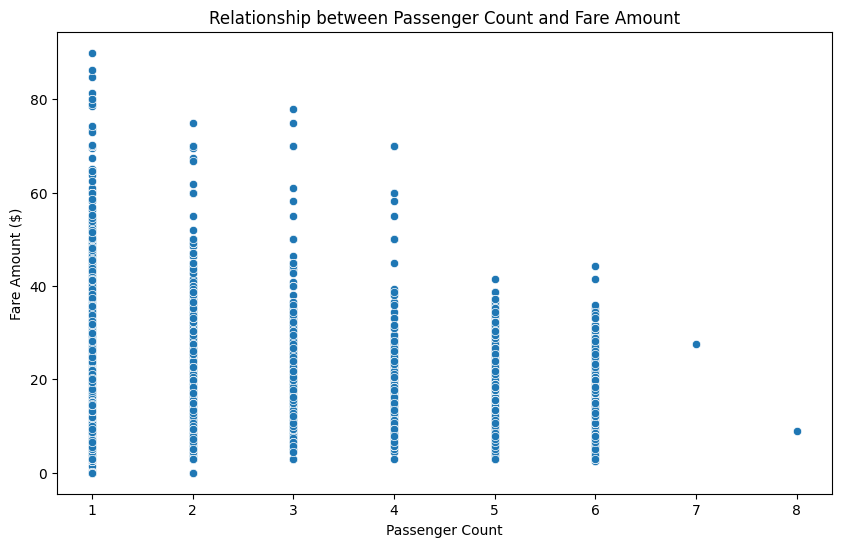

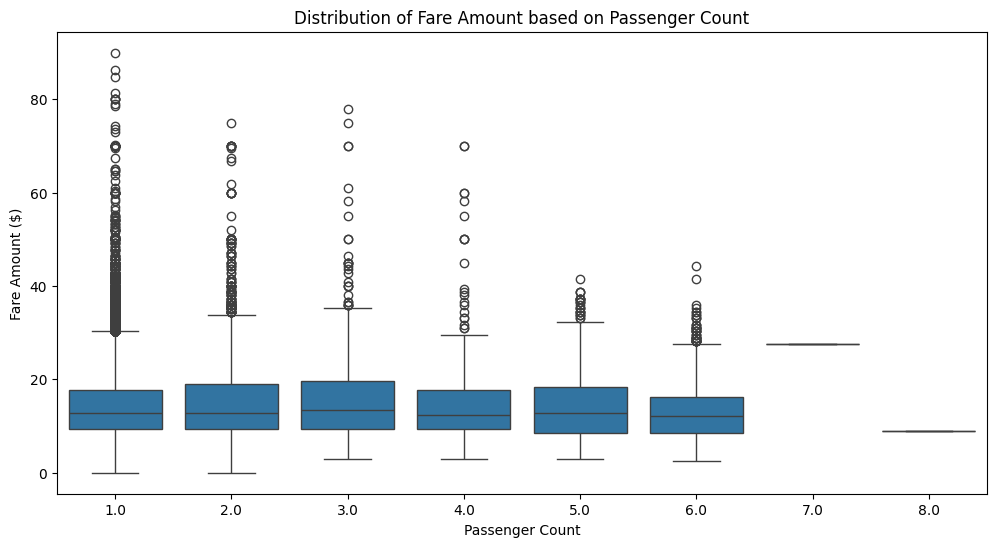

In [151]:
# Create scatter plot to see the relationship between passenger_count and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Relationship between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

# Create box plot to see the distribution of fare_amount based on passenger_count
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Distribution of Fare Amount based on Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

- Analyze the relationship between fare amount, distance, and duration.

In [152]:
#summary statistics
summary_stats = df[['fare_amount', 'trip_distance', 'trip_duration']].describe()
summary_stats

,fare_amount,trip_distance,trip_duration
count,58632.000000,58632.000000,58632.000000
mean,14.439674,2.296233,0.207120
std,7.500238,1.556314,0.127156
min,0.000000,0.010000,0.000000
25%,9.300000,1.200000,0.119444
50%,12.800000,1.840000,0.181944
75%,17.700000,2.980000,0.265000
max,90.000000,7.440000,1.886667


In [153]:
#correlation matrix
correlation_matrix = df[['fare_amount', 'trip_distance', 'trip_duration']].corr()
correlation_matrix

,fare_amount,trip_distance,trip_duration
fare_amount,1.000000,0.869888,0.849906
trip_distance,0.869888,1.000000,0.732411
trip_duration,0.849906,0.732411,1.000000


 -  Kesimpulan Umum Model regresi menunjukkan bahwa jarak yang ditempuh dan durasi perjalanan memengaruhi jumlah tarif secara signifikan. Jarak tampaknya menjadi faktor utama yang menentukan tarif, sedangkan durasi memiliki dampak yang lebih kecil tetapi tetap signifikan. Model ini dapat digunakan untuk memperkirakan jumlah tarif untuk perjalanan tertentu berdasarkan jarak dan durasinya dengan akurasi yang wajar.

In [155]:
df.to_csv(r'NYC TLC Trip Record - Clean.csv', index= False)